In [1]:
import pandas as pd

kuchive = pd.read_csv('kuchive.csv')
tags = pd.read_csv('tag_1.csv',encoding='cp949',header=None)
tags.columns = ['index', 'title', 'site', 'img', 'description', 'txt', 'tags']
jobs = pd.read_csv('jobs.csv')
activity = pd.read_csv('activity.csv')
contest = pd.read_csv('contest.csv')

In [4]:
kuchive = kuchive.iloc[:, -2:]
contest = contest.iloc[:, -2:]
activity = activity.iloc[:, -2:]
tags = tags.iloc[:, [4, 6]]
jobs = jobs.iloc[:, [3, 6]]

In [6]:
data = pd.concat([tags, kuchive, jobs, activity, contest])
data.head()

,description,tags
0,"?? STREET BOND 소개\r\n운동은 하고 싶은데, 몇 달 회비 끊고 하자니...","동아리', '스포츠', '호스트'"
1,일본문화에 관심이 있으신가요? 심심한데 마땅한 동아리가 없으신가요? 중앙동아리 한일...,"'동아리', '문화', '활동', '연구'"
2,"??2020년도 2학기 KUISA 14기 벗 모집 안내??\n\r\nKUISA란, ...","동아리', '외국인', '도움'"
3,안녕하세요! 원불교 학생회입니다. ㅎㅎ\r\n이번에는 명상을 어떻게 하는 지에 대한...,"명상', '동아리', '원불교'"
4,[22기 P.O.P 단원 모집!]\n\r\n?? 스펙업 대표동아리 Top30\r\n...,"'발표', '피드백', '토론', '동아리', '공식'"


In [7]:
data = data.sample(frac=1)
data.head()

,description,tags
200,고려대학교 중앙 스쿼시동아리 ??엔더스??에서 신입부원을 모집합니다.\r\n학번무관...,"스쿼시', '체육관', '운동'"
97,현재 유니폼 신청중이기 때문에 바로 들어오시면 유니폼 신청 가능합니다!\r\n동아리...,"'야구', '동아리', '퍼블릭스'"
75,"서울, 건축 이야기 제6회 나와 함께한 건축, 스토리텔링 공모전 ● 응모 자격 -...","['공모전', '경영/컨설팅/마케팅', '기타']"
559,"안녕하세요, “나는 생각한다. 고로 토론한다.”\r\n고려대학교 최초?최다 수상 토...","언어', '동아리'"
132,안녕하세요~? 우리 아기호랑이들!!?????? \r\n살아움직이며 실천하는 풍물패 ...,"농악대', '동아리', '풍물패', '모집'"


In [23]:
data.shape

(1035, 2)

In [24]:
train_data = data.iloc[:835,].reset_index()
test_data = data.iloc[835:,].reset_index()

In [55]:
test_data.head()

,index,description,tags
0,355,고려대학교 호스피스 봉사동아리에서 년 신입 회원을 모집합니다 동아리 소...,"'호스피스', '봉사', '동아리', '모집', '봉사활동'"
1,300,고집 고려대학교 해비타트 건축봉사 동아리 고집에서 기 신입부원을 모집합니다면접 및...,"봉사', '고집', '동아리', '해비타트'"
2,209,신생 동아리체계 없음뚜렷한 목적 없음시간 낭비일 수 있음반말 나이 불문 현재 할 수...,"'동아리', '운동'"
3,41,대학생 연합 영상 동아리 시그널 기를 모집합니다 우리가 상상하고 꿈꾸는 모든 것들...,"영상', '시그널', '활동', '동아리', '제작'"
4,153,안녕하세요 새내기 및 정든내기 여러분 고려대학교 중앙동아리 관현악단에서 새학기를 맞...,"관현악단', '중앙', '모집'"


In [25]:
import numpy as np

train_data['description'] = train_data['description'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","") # 정규 표현식 수행, 완성형 한글의 범위
train_data['description'].replace('', np.nan, inplace=True) # 공백은 Null 값으로 변경
train_data = train_data.dropna(how='any') # Null 값 제거

print('전처리 후 훈련용 샘플의 개수 :',len(train_data))

전처리 후 훈련용 샘플의 개수 : 825


In [26]:
test_data['description'] = test_data['description'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","") # 정규 표현식 수행, 완성형 한글의 범위
test_data['description'].replace('', np.nan, inplace=True) # 공백은 Null 값으로 변경
test_data = test_data.dropna(how='any') # Null 값 제거

print('전처리 후 테스트용 샘플의 개수 :',len(test_data))

전처리 후 테스트용 샘플의 개수 : 197


In [27]:
from konlpy.tag import Okt

okt = Okt()

In [28]:
import ssl
from urllib.request import urlopen
from bs4 import BeautifulSoup

context = ssl._create_unverified_context()
resp = urlopen('https://www.ranks.nl/stopwords/korean',context=context)
dom = BeautifulSoup(resp.read().decode('utf8'),'html.parser')
tds = dom.select('.panel-body > table > tbody > tr > td')

In [29]:
import re

stopwords=[]

for _ in tds:
    stopwords+=re.findall(r'([ \w]+)<br/>',str(_))
    
stopwords.append('만큼')
stopwords.append('만 못하다')
stopwords.append('영')
stopwords.append('의')
stopwords.append('하다')
stopwords.append('가')
stopwords.append('이')
stopwords.append('은')
stopwords.append('좀')
stopwords.append('를')
stopwords.append('들')
stopwords.append('는')
stopwords.append('잘')
stopwords.append('자')
stopwords.append('에')
stopwords.append('와')
stopwords.append('한')
stopwords.append('과')
stopwords.append('도')

In [30]:
X_train = []

for sentence in train_data['description']:
    temp_X = []
    temp_X = okt.morphs(sentence, stem=True) # 토큰화
    temp_X = [word for word in temp_X if not word in stopwords] # 불용어 제거
    X_train.append(temp_X)

In [31]:
X_test = []

for sentence in test_data['description']:
    temp_X = []
    temp_X = okt.morphs(sentence, stem=True) # 토큰화
    temp_X = [word for word in temp_X if not word in stopwords] # 불용어 제거
    X_test.append(temp_X)

In [32]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train)  

In [33]:
threshold = 3  # 기준치

total_cnt = len(tokenizer.word_index) # 단어의 수
rare_cnt = 0 # 등장 빈도수가 threshold보다 작은 단어의 개수를 카운트
total_freq = 0 # 훈련 데이터의 전체 단어 빈도수 총 합
rare_freq = 0 # 등장 빈도수가 threshold보다 작은 단어의 등장 빈도수의 총 합

for key, value in tokenizer.word_counts.items():  # 단어와 빈도수의 쌍(pair)을 key와 value로
    total_freq = total_freq + value

    if(value < threshold):  # 단어의 등장 빈도수가 threshold보다 작으면
        rare_cnt = rare_cnt + 1
        rare_freq = rare_freq + value

print('단어 집합(vocabulary)의 크기 :',total_cnt)
print('등장 빈도가 %s번 이하인 희귀 단어의 수: %s'%(threshold - 1, rare_cnt))
print("단어 집합에서 희귀 단어의 비율:", (rare_cnt / total_cnt)*100)
print("전체 등장 빈도에서 희귀 단어 등장 빈도 비율:", (rare_freq / total_freq)*100)

단어 집합(vocabulary)의 크기 : 8654
등장 빈도가 2번 이하인 희귀 단어의 수: 3694
단어 집합에서 희귀 단어의 비율: 42.6854633695401
전체 등장 빈도에서 희귀 단어 등장 빈도 비율: 2.8011784744280255


txt의 최대 길이 : 1049
txt의 평균 길이 : 210.64727272727274


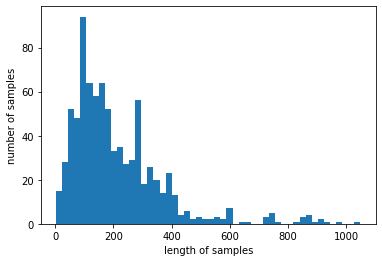

In [34]:
%matplotlib inline
import matplotlib.pyplot as plt

print('txt의 최대 길이 :',max(len(l) for l in X_train))
print('txt의 평균 길이 :',sum(map(len, X_train))/len(X_train))
plt.hist([len(s) for s in X_train], bins=50)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

In [35]:
vocab_size = total_cnt - rare_cnt + 2

print('단어 집합의 크기 :',vocab_size)

단어 집합의 크기 : 4962


In [36]:
tokenizer = Tokenizer(vocab_size, oov_token = 'OOV') 
tokenizer.fit_on_texts(X_train)

X_train = tokenizer.texts_to_sequences(X_train)
X_test = tokenizer.texts_to_sequences(X_test)

In [37]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(tokenizer = lambda x: x.split(","), binary='true')

y_train = vectorizer.fit_transform(train_data['tags']).toarray()
y_test = vectorizer.transform(test_data['tags']).toarray()

In [57]:
print(len(y_train[0]))
print(len(y_train[1]))
print(len(y_test[0]))
print(len(y_test[1]))

490
490
490
490


In [38]:
max_len=500
X_train = pad_sequences(X_train, maxlen = max_len)
X_test = pad_sequences(X_test, maxlen = max_len)

In [39]:
print(y_train.shape)
print(y_test.shape)

(825, 490)
(197, 490)


In [45]:
vectorizer.vocabulary_

{"스쿼시'": 424,
 " '체육관'": 252,
 " '운동'": 194,
 "'야구'": 338,
 " '동아리'": 64,
 " '퍼블릭스'": 282,
 "['공모전'": 357,
 " '경영/컨설팅/마케팅'": 5,
 " '기타']": 43,
 "언어'": 435,
 "농악대'": 384,
 " '풍물패'": 285,
 " '모집'": 88,
 "활동'": 489,
 " '학생'": 295,
 " '외국인'": 191,
 " '도움'": 61,
 " '사회공헌/교류'": 120,
 " '의료/보건'": 208,
 " '콘텐츠']": 271,
 '취업': 468,
 "'아스'": 337,
 " '댄스'": 56,
 " '스포츠'": 147,
 " '지원'": 240,
 " '보건'": 102,
 "운동'": 445,
 "동아리'": 391,
 " '친목'": 261,
 "'작곡'": 344,
 " '관심'": 26,
 " '크루'": 272,
 " '디자인/사진/예술/영상'": 67,
 "봉사'": 414,
 " '햇빛'": 303,
 " '교육'": 28,
 "엘리'": 436,
 " '음악'": 205,
 " '공연'": 19,
 " '응원단'": 206,
 "['대외활동'": 358,
 " '정치/사회/법률'": 231,
 "'세미나'": 335,
 " '학기'": 293,
 " '진행'": 243,
 " '재판'": 222,
 "피아노'": 483,
 " '연주회'": 178,
 "보컬'": 413,
 " '추가모집'": 256,
 " '애기능'": 163,
 " '창업/자기계발']": 246,
 "'체육'": 348,
 " '정보'": 228,
 " '코로나'": 268,
 "베이스'": 409,
 " '구름다리'": 30,
 " '밴드'": 97,
 " '태권도'": 276,
 "역도부'": 437,
 " '행사'": 305,
 "스포츠'": 426,
 " '취재'": 260,
 " '현장'": 308,
 " '경제/금융']": 10,
 

In [40]:
from tensorflow.keras.layers import Embedding, Dense, LSTM, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.models import load_model
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

model = Sequential()
model.add(Embedding(vocab_size, output_dim=256, input_length=500))
model.add(LSTM(128, return_sequences=True))
model.add(Dropout(0.5))
model.add(LSTM(64))
model.add(Dropout(0.5))
model.add(Dense(490, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 500, 256)          1270272   
_________________________________________________________________
lstm (LSTM)                  (None, 500, 128)          197120    
_________________________________________________________________
dropout (Dropout)            (None, 500, 128)          0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 64)                49408     
_________________________________________________________________
dropout_1 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense (Dense)                (None, 490)               31850     
Total params: 1,548,650
Trainable params: 1,548,650
Non-trainable params: 0
______________________________________________

In [46]:
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=4)
mc = ModelCheckpoint('best_model.h5', monitor='val_acc', mode='max', verbose=1, save_best_only=True)

model.compile(optimizer='adam', loss='categorical_crossentropy', call_backs=[es, mc], metrics=['acc'])
history = model.fit(X_train, y_train, epochs=15)


Train on 825 samples
Epoch 1/15
825/825 [==============================] - 32s 38ms/sample - loss: 15.2996 - acc: 0.0594
Epoch 2/15
825/825 [==============================] - 27s 33ms/sample - loss: 15.8860 - acc: 0.0533
Epoch 3/15
825/825 [==============================] - 27s 33ms/sample - loss: 16.0671 - acc: 0.0521
Epoch 4/15
825/825 [==============================] - 28s 33ms/sample - loss: 16.3740 - acc: 0.0521
Epoch 5/15
825/825 [==============================] - 29s 35ms/sample - loss: 16.5786 - acc: 0.0582
Epoch 6/15
825/825 [==============================] - 30s 36ms/sample - loss: 16.7566 - acc: 0.0594
Epoch 7/15
825/825 [==============================] - 28s 34ms/sample - loss: 16.9927 - acc: 0.0533
Epoch 8/15
825/825 [==============================] - 29s 35ms/sample - loss: 17.1024 - acc: 0.0558
Epoch 9/15
825/825 [==============================] - 28s 34ms/sample - loss: 17.3836 - acc: 0.0582
Epoch 10/15
825/825 [==============================] - 28s 33ms/sample - loss: 

In [49]:
preds_list = model.predict(X_test)
preds_list

array([[2.5252216e-06, 1.2197306e-07, 1.7637464e-06, ..., 1.2194906e-02,
        3.9021682e-08, 8.0301448e-05],
       [2.5252216e-06, 1.2197306e-07, 1.7637464e-06, ..., 1.2194906e-02,
        3.9021682e-08, 8.0301412e-05],
       [2.5252245e-06, 1.2197309e-07, 1.7637469e-06, ..., 1.2194908e-02,
        3.9021689e-08, 8.0301470e-05],
       ...,
       [2.5252252e-06, 1.2197312e-07, 1.7637490e-06, ..., 1.2194901e-02,
        3.9021700e-08, 8.0301492e-05],
       [2.5252252e-06, 1.2197313e-07, 1.7637474e-06, ..., 1.2194890e-02,
        3.9021664e-08, 8.0301455e-05],
       [2.5252220e-06, 1.2197309e-07, 1.7637467e-06, ..., 1.2194908e-02,
        3.9021689e-08, 8.0301463e-05]], dtype=float32)

In [93]:
X_test

array([[  0,   0,   0, ...,  41,   7,  42],
       [  0,   0,   0, ...,  41,   7,  42],
       [  0,   0,   0, ...,  41,   7,  42],
       ...,
       [  0,   0,   0, ...,  41,   7,  42],
       [  0,   0,   0, ..., 112,   1,  65],
       [  0,   0,   0, ...,  41,   7,  42]])

In [94]:
y_test

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [95]:
vectorizer.vocabulary_

{"스쿼시'": 424,
 " '체육관'": 252,
 " '운동'": 194,
 "'야구'": 338,
 " '동아리'": 64,
 " '퍼블릭스'": 282,
 "['공모전'": 357,
 " '경영/컨설팅/마케팅'": 5,
 " '기타']": 43,
 "언어'": 435,
 "농악대'": 384,
 " '풍물패'": 285,
 " '모집'": 88,
 "활동'": 489,
 " '학생'": 295,
 " '외국인'": 191,
 " '도움'": 61,
 " '사회공헌/교류'": 120,
 " '의료/보건'": 208,
 " '콘텐츠']": 271,
 '취업': 468,
 "'아스'": 337,
 " '댄스'": 56,
 " '스포츠'": 147,
 " '지원'": 240,
 " '보건'": 102,
 "운동'": 445,
 "동아리'": 391,
 " '친목'": 261,
 "'작곡'": 344,
 " '관심'": 26,
 " '크루'": 272,
 " '디자인/사진/예술/영상'": 67,
 "봉사'": 414,
 " '햇빛'": 303,
 " '교육'": 28,
 "엘리'": 436,
 " '음악'": 205,
 " '공연'": 19,
 " '응원단'": 206,
 "['대외활동'": 358,
 " '정치/사회/법률'": 231,
 "'세미나'": 335,
 " '학기'": 293,
 " '진행'": 243,
 " '재판'": 222,
 "피아노'": 483,
 " '연주회'": 178,
 "보컬'": 413,
 " '추가모집'": 256,
 " '애기능'": 163,
 " '창업/자기계발']": 246,
 "'체육'": 348,
 " '정보'": 228,
 " '코로나'": 268,
 "베이스'": 409,
 " '구름다리'": 30,
 " '밴드'": 97,
 " '태권도'": 276,
 "역도부'": 437,
 " '행사'": 305,
 "스포츠'": 426,
 " '취재'": 260,
 " '현장'": 308,
 " '경제/금융']": 10,
 

In [90]:
idxs = []

for i in range(len(preds_list)):
    pred = preds_list[i]
    idx = np.argmax(pred)
    idxs.append(idx)
            
idxs 

[357,
 357,
 357,
 357,
 357,
 357,
 357,
 357,
 357,
 357,
 357,
 357,
 357,
 357,
 357,
 357,
 357,
 357,
 357,
 357,
 357,
 357,
 357,
 357,
 357,
 357,
 357,
 357,
 357,
 357,
 357,
 357,
 357,
 357,
 357,
 357,
 357,
 357,
 357,
 357,
 357,
 357,
 357,
 357,
 357,
 357,
 357,
 357,
 357,
 357,
 357,
 357,
 357,
 357,
 357,
 357,
 357,
 357,
 357,
 357,
 357,
 357,
 357,
 357,
 357,
 357,
 357,
 357,
 357,
 357,
 357,
 357,
 357,
 357,
 357,
 357,
 357,
 357,
 357,
 357,
 357,
 357,
 357,
 357,
 357,
 357,
 357,
 357,
 357,
 357,
 357,
 357,
 357,
 357,
 357,
 357,
 357,
 357,
 357,
 357,
 357,
 357,
 357,
 357,
 357,
 357,
 357,
 357,
 357,
 357,
 357,
 357,
 357,
 357,
 357,
 357,
 357,
 357,
 357,
 357,
 357,
 357,
 357,
 357,
 357,
 357,
 357,
 357,
 357,
 357,
 357,
 357,
 357,
 357,
 357,
 357,
 357,
 357,
 357,
 357,
 357,
 357,
 357,
 357,
 357,
 357,
 357,
 357,
 357,
 357,
 357,
 357,
 357,
 357,
 357,
 357,
 357,
 357,
 357,
 357,
 357,
 357,
 357,
 357,
 357,
 357,
 357

In [81]:
a = list(preds_list[0])
b = list(preds_list[1])

In [97]:
tag_index = vectorizer.vocabulary_
new_tag = {}

for k, v in tag_index.items():
    new_tag[v] = k

In [98]:
new_tag.get(357)

"['공모전'"

In [99]:
test_data

,index,description,tags
0,355,고려대학교 호스피스 봉사동아리에서 년 신입 회원을 모집합니다 동아리 소...,"'호스피스', '봉사', '동아리', '모집', '봉사활동'"
1,300,고집 고려대학교 해비타트 건축봉사 동아리 고집에서 기 신입부원을 모집합니다면접 및...,"봉사', '고집', '동아리', '해비타트'"
2,209,신생 동아리체계 없음뚜렷한 목적 없음시간 낭비일 수 있음반말 나이 불문 현재 할 수...,"'동아리', '운동'"
3,41,대학생 연합 영상 동아리 시그널 기를 모집합니다 우리가 상상하고 꿈꾸는 모든 것들...,"영상', '시그널', '활동', '동아리', '제작'"
4,153,안녕하세요 새내기 및 정든내기 여러분 고려대학교 중앙동아리 관현악단에서 새학기를 맞...,"관현악단', '중앙', '모집'"
5,288,고려대학교 중앙 스쿼시동아리 엔더스에서 신입부원을 모집합니다학번무관학과무관성별무관상...,"스쿼시', '체육관', '운동'"
6,586,고려대학교 최고경영전략학회 기 모집 국제경영 최고의 권위자 김익수 교수님과...,"경영', '학회', '스터디'"
7,182,제회 전라남도 청소년 성평등 콘텐츠 공모전 제출기간 월 금 참가자격 ...,"['공모전', '디자인/사진/예술/영상', '콘텐츠']"
8,150,안녕하세요국립중앙도서관에서는 도서관 빅데이터를 활용한 도서관 경영의 과학화 및 이용...,"['공모전', '과학/공학/기술/IT', '기타']"
9,303,고려대학교 가톨릭학생회 젊은예수에서 새식구를 모집합니다 가톨릭학생회 젊은예수 대 운...,"가톨릭', '학생회', '종교', '예수'"
